In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
data=pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [234]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


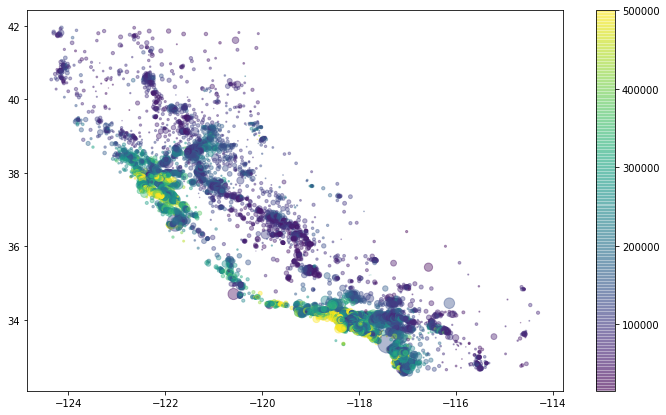

In [235]:
plt.figure(figsize=(12,7))
plt.scatter(data.longitude,data.latitude,alpha=0.4,s=data.population/100,c=data.median_house_value)
plt.colorbar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021B3004FD88>,
      dtype=object)

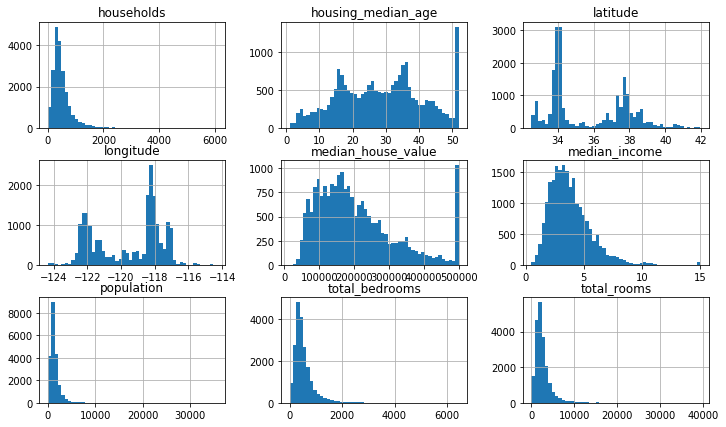

In [236]:
data.hist(bins=50,figsize=(12,7))

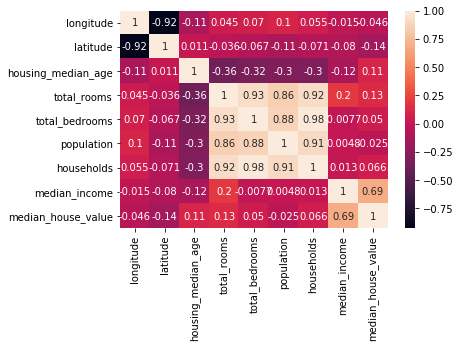

In [241]:
sns.heatmap(data.corr(),annot=True)

In [249]:
y=data['median_house_value']
x=data.drop('median_house_value',axis=1)

In [250]:
x.isnull().sum() 

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [251]:
x['total_bedrooms'].fillna(x.total_bedrooms.mean() ,inplace=True)

In [252]:
x.isnull().sum() 

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [253]:
x['rooms_per_house']=x['total_rooms']/x['households']
x['bedrooms_per_house']=x['total_bedrooms']/x['households']
x['population_per_house']=x['population']/x['households']
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [254]:
train=x.join(y)
relation=train.corr()
relation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedrooms_per_house,population_per_house,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.027540,0.011079,0.002476,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,0.106389,0.062414,0.002366,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,-0.153277,-0.054704,0.013191,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.133798,0.009005,-0.024581,0.134153
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.001535,0.039920,-0.028354,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.072213,-0.074885,0.069863,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,-0.080598,-0.066444,-0.027309,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.326895,-0.047291,0.018766,0.688075
rooms_per_house,-0.027540,0.106389,-0.153277,0.133798,0.001535,-0.072213,-0.080598,0.326895,1.000000,0.741273,-0.004852,0.151948
bedrooms_per_house,0.011079,0.062414,-0.054704,0.009005,0.039920,-0.074885,-0.066444,-0.047291,0.741273,1.000000,-0.005497,-0.044265


In [255]:
relation['median_house_value'].sort_values(ascending=False)

median_house_value      1.000000
median_income           0.688075
rooms_per_house         0.151948
total_rooms             0.134153
housing_median_age      0.105623
households              0.065843
total_bedrooms          0.049454
population_per_house   -0.023737
population             -0.024650
bedrooms_per_house     -0.044265
longitude              -0.045967
latitude               -0.144160
Name: median_house_value, dtype: float64

Text(0.5, 1.0, 'Linear correlation between median income and median house value')

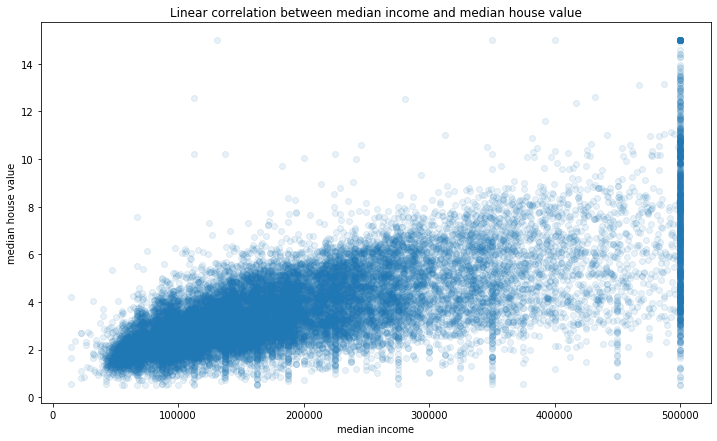

In [256]:
plt.figure(figsize=(12,7))
plt.scatter('median_house_value','median_income',data=data,alpha=0.1)
plt.xlabel('median income')
plt.ylabel('median house value')
plt.title('Linear correlation between median income and median house value')

In [257]:
lr=LinearRegression()
x=train['median_income'].values.reshape(-1,1)
y=train['median_house_value'].values.reshape(-1,1)
lr.fit(x,y)
prediction=lr.predict(x)
mse=mean_squared_error(prediction,y)
ans=np.sqrt(mse)
ans
#root mean square error comes out to be 83733.57. This can be improved.

83733.57452616918

In [258]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   longitude             20640 non-null  float64
 1   latitude              20640 non-null  float64
 2   housing_median_age    20640 non-null  float64
 3   total_rooms           20640 non-null  float64
 4   total_bedrooms        20640 non-null  float64
 5   population            20640 non-null  float64
 6   households            20640 non-null  float64
 7   median_income         20640 non-null  float64
 8   ocean_proximity       20640 non-null  object 
 9   rooms_per_house       20640 non-null  float64
 10  bedrooms_per_house    20640 non-null  float64
 11  population_per_house  20640 non-null  float64
 12  median_house_value    20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [259]:
dummies=pd.get_dummies(train['ocean_proximity'])

In [260]:
train=train.join(dummies)

In [261]:
train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_house', 'bedrooms_per_house',
       'population_per_house', 'median_house_value', '<1H OCEAN', 'INLAND',
       'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [262]:
train=train.drop('<1H OCEAN',axis=1)

In [263]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   longitude             20640 non-null  float64
 1   latitude              20640 non-null  float64
 2   housing_median_age    20640 non-null  float64
 3   total_rooms           20640 non-null  float64
 4   total_bedrooms        20640 non-null  float64
 5   population            20640 non-null  float64
 6   households            20640 non-null  float64
 7   median_income         20640 non-null  float64
 8   ocean_proximity       20640 non-null  object 
 9   rooms_per_house       20640 non-null  float64
 10  bedrooms_per_house    20640 non-null  float64
 11  population_per_house  20640 non-null  float64
 12  median_house_value    20640 non-null  float64
 13  INLAND                20640 non-null  uint8  
 14  ISLAND                20640 non-null  uint8  
 15  NEAR BAY           

In [264]:
train=train.drop('ocean_proximity', axis=1)

In [265]:
y=train['median_house_value']
x=train.drop('median_house_value',axis=1)

In [266]:
pipeline=Pipeline([('std_scaler',StandardScaler()),('poly_feature',PolynomialFeatures(degree=2))])
housing=pipeline.fit_transform(x)

In [267]:
lr=LinearRegression()
lr.fit(housing,y)
prediction=lr.predict(housing)
mse=mean_squared_error(prediction,y)
ansx=np.sqrt(mse)
ansx

60819.65297033724

In [268]:
ans

83733.57452616918

In [269]:
#significant improvement over Linear Regression model without polynomial feature
ans-ansx

22913.921555831934

In [270]:
x_train,x_test,y_train,y_test=train_test_split(x,y);

In [271]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   longitude             20640 non-null  float64
 1   latitude              20640 non-null  float64
 2   housing_median_age    20640 non-null  float64
 3   total_rooms           20640 non-null  float64
 4   total_bedrooms        20640 non-null  float64
 5   population            20640 non-null  float64
 6   households            20640 non-null  float64
 7   median_income         20640 non-null  float64
 8   rooms_per_house       20640 non-null  float64
 9   bedrooms_per_house    20640 non-null  float64
 10  population_per_house  20640 non-null  float64
 11  INLAND                20640 non-null  uint8  
 12  ISLAND                20640 non-null  uint8  
 13  NEAR BAY              20640 non-null  uint8  
 14  NEAR OCEAN            20640 non-null  uint8  
dtypes: float64(11), uin

In [273]:
m=RandomForestRegressor(n_estimators=50)
m.fit(x_train,y_train)
accuracy=m.score(x_test,y_test)
accuracy=accuracy*100
accuracy

81.60032803543737

In [274]:
m.score(x_train,y_train)*100

97.29186985731165

In [225]:
lr.fit(x_train,y_train)
accuracyx=lr.score(x_test,y_test)
accuracyx=accuracyx*100
accuracyx

64.65593850025473

In [226]:
lr.score(x_train,y_train)*100

64.6454137689851